# Drift Detection

In [1]:
import ad_dd as ADDD
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
def generate_toy_example(M1,V1,M2,V2,M3,V3,trend_bool=False):
    # Generate data for 3 distributions
    random_state = np.random.RandomState(seed=42)
    dist_a = random_state.normal(M1, V1, 1000)
    dist_b = random_state.normal(M2, V2, 1000)
    dist_c = random_state.normal(M3, V3, 1000)

    # Concatenate data to simulate a data stream with 2 drifts
    stream = np.concatenate((dist_a, dist_b, dist_c))

    #Normalization of panda series between 0 and 1
    def scaler_series(TS_to_scale):
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(TS_to_scale.values.reshape(-1, 1))

        # Conversion np tab in pandas series
        scaled_series = pd.Series(scaled_data.flatten())
        return scaled_series

    if trend_bool==True :
        trend = np.linspace(0, 1, len(stream))
        stream = stream + trend

    stream_series = pd.Series(stream)
    stream_series = scaler_series(stream_series)

    plt.plot(stream_series)
    plt.show()

    return stream_series

## Toy example 1 :

- Shift in the mean at 1000
- Shift in the variance at 2000

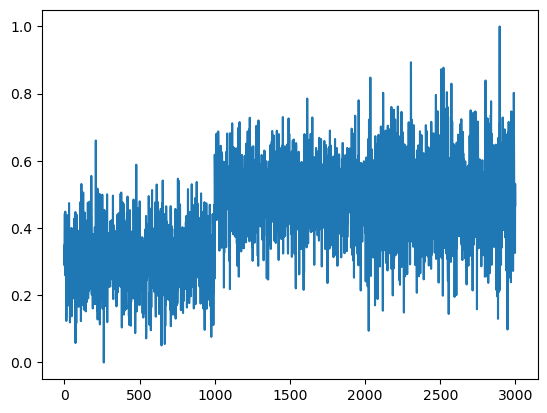

In [4]:
toy_data = generate_toy_example(0.5, 0.05, 0.6, 0.05, 0.6, 0.07, False)

ADWIN done
Variance by entropy done
Variance Shift Detection done
Linear Piecewise Done
Reconstruction done


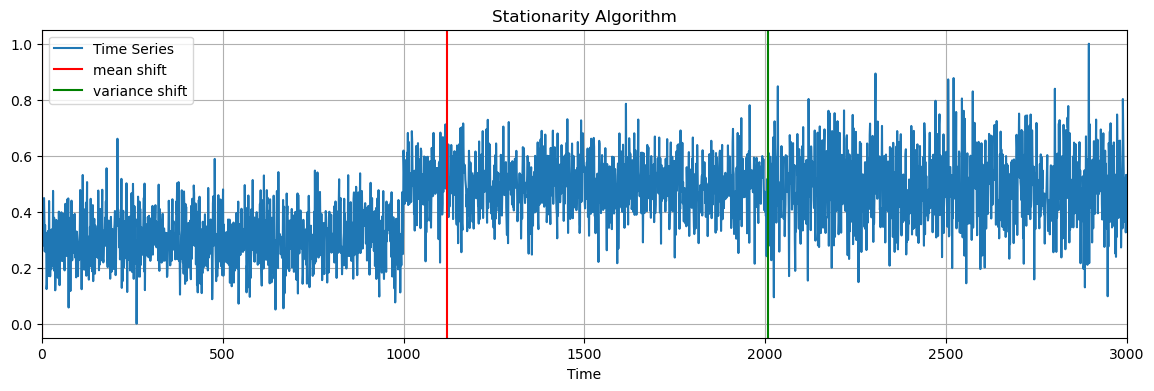

In [5]:
D_test = ADDD.AD_DD(toy_data)
_ = D_test.fit_stationarity_detection(delta_adwin=0.002, threshold_negentropy=10e-4, threshold_piecewise=0.65, max_breaks_piecewise=10, plot_bool=True, x1=0, x2=0)

## Toy example 2 :

- Shift in the mean at 1000 and 2000
- No shift in the variance

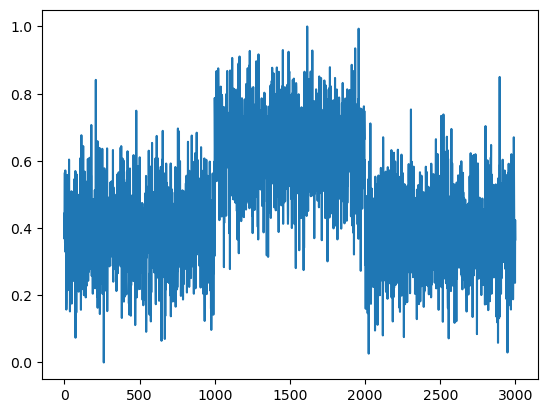

In [6]:
toy_data_2 = generate_toy_example(0.5, 0.05, 0.6, 0.05, 0.5, 0.05, False)

ADWIN done
Variance by entropy done
Variance Shift Detection done
Linear Piecewise Done
Reconstruction done


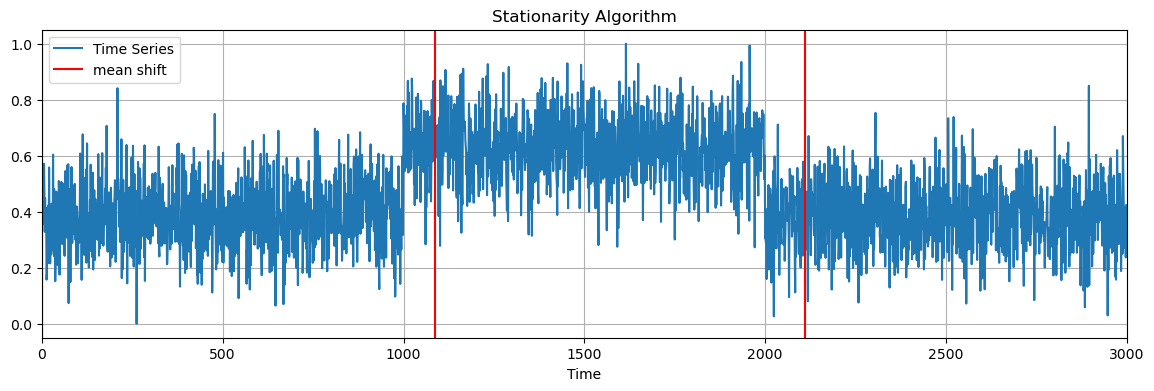

In [7]:
D_test_2 = ADDD.AD_DD(toy_data_2)
_ = D_test_2.fit_stationarity_detection(delta_adwin=0.002, threshold_negentropy=10e-4, threshold_piecewise=0.65, max_breaks_piecewise=10, plot_bool=True, x1=0, x2=0)

## Toy example 3 :

- No shift in the mean
- Shift in the variance at 1000

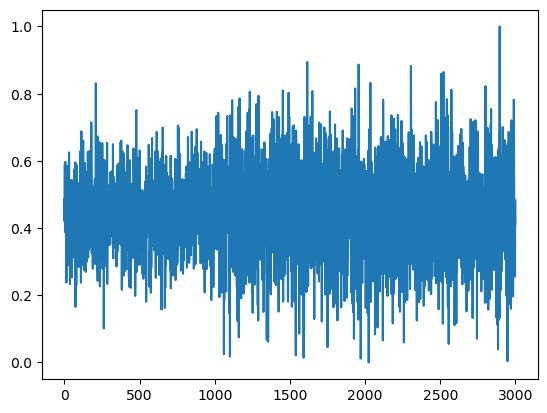

In [8]:
toy_data_3 = generate_toy_example(0.5, 0.05, 0.5, 0.07, 0.5, 0.07, False)

ADWIN done
Variance by entropy done
Variance Shift Detection done
Linear Piecewise Done
Reconstruction done


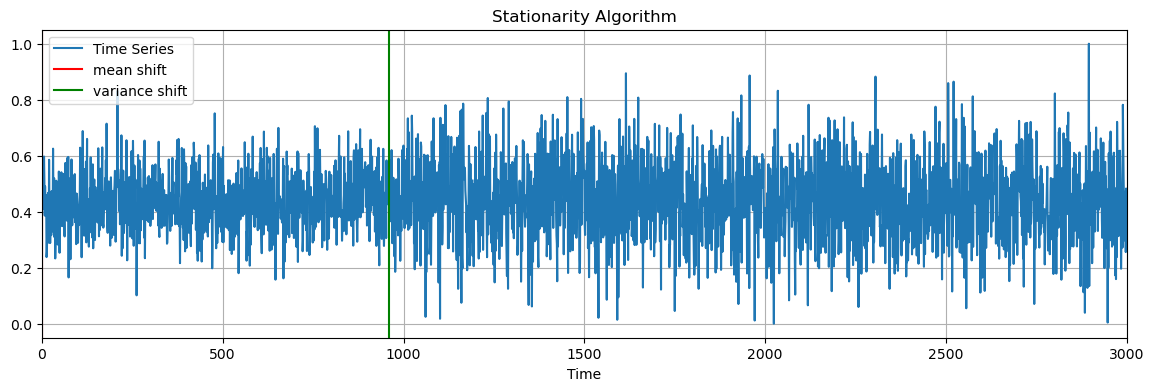

In [9]:
D_test_3 = ADDD.AD_DD(toy_data_3)
_ = D_test_3.fit_stationarity_detection(delta_adwin=0.002, threshold_negentropy=10e-4, threshold_piecewise=0.65, max_breaks_piecewise=10, plot_bool=True, x1=0, x2=0)

## Toy example 4 :

- No shift in the mean
- Shift in the variance at 2000
- Trend

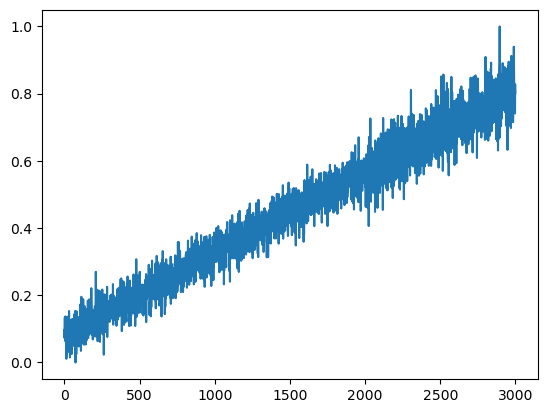

In [10]:
toy_data_4 = generate_toy_example(0.5, 0.05, 0.5, 0.05, 0.5, 0.075, True)

ADWIN done
Variance by entropy done
Variance Shift Detection done
Linear Piecewise Done
Reconstruction done


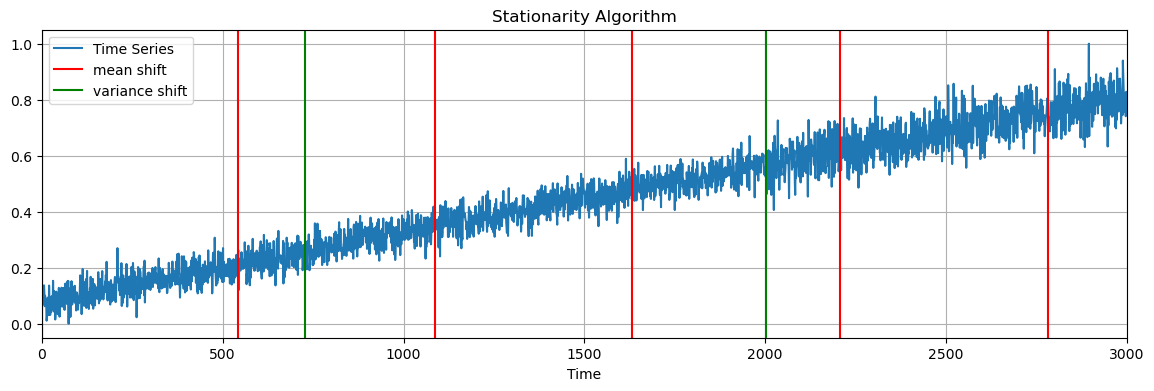

In [11]:
D_test_4 = ADDD.AD_DD(toy_data_4)
_ = D_test_4.fit_stationarity_detection(delta_adwin=0.002, threshold_negentropy=10e-4, threshold_piecewise=0.65, max_breaks_piecewise=10, plot_bool=True, x1=0, x2=0)